In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import pickle
import os
import glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
import torch.nn as nn

from torch.utils.data import DataLoader
from torch.utils.data.dataset import TensorDataset

In [4]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai import *

## Dataset

In [19]:
def generate_data(size):
    x = np.random.uniform(size=(size, 1))
    y = x * 2.0
    return x.astype(np.float32), y.astype(np.float32)

x_train, y_train = generate_data(10000)
x_valid, y_valid = generate_data(1000)

In [6]:
type(x_train)

numpy.ndarray

In [20]:
x_train

array([[0.822126],
       [0.31789 ],
       [0.587393],
       [0.610803],
       ...,
       [0.864264],
       [0.815409],
       [0.385487],
       [0.804454]], dtype=float32)

## Model

In [7]:
class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear1 = nn.Linear(1, 5)
        self.linear2 = nn.Linear(5, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.linear2(x)

        return x

## Training

In [21]:
x_train,y_train,x_valid,y_valid = map(torch.tensor, (x_train,y_train,x_valid,y_valid))

In [22]:
x_train.shape

torch.Size([10000, 1])

In [ ]:
n,c = x_train.shape
x_train.shape, y_train.min(), y_train.max()

In [9]:
bs=50
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)
data = DataBunch.create(train_ds, valid_ds, bs=bs)

In [10]:
x,y = next(iter(data.train_dl))
x.shape,y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [32]:
type(x[0].item())

float

In [35]:
x.min(), x.max()

(tensor(0.0108, device='cuda:0'), tensor(0.9921, device='cuda:0'))

In [11]:
model = SimpleModel().cuda()

In [12]:
model(x).shape

torch.Size([50, 1])

In [13]:
loss_func = nn.MSELoss()
learn = Learner(data, SimpleModel(), loss_func=loss_func)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


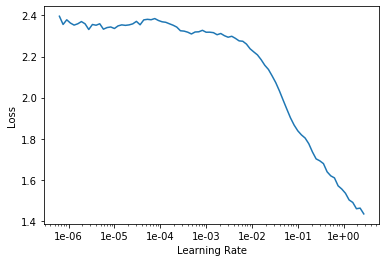

In [14]:
learn.lr_find()
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(1, 1e-1)

epoch,train_loss,valid_loss,time
0,0.019098,0.000003,00:12


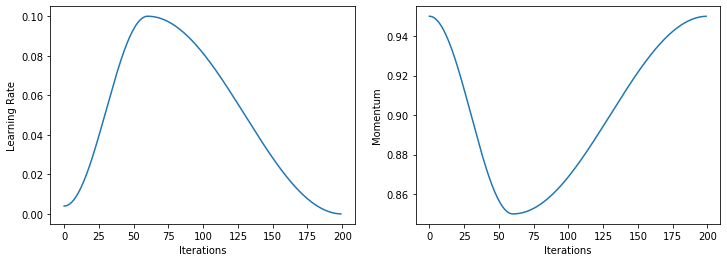

In [16]:
learn.recorder.plot_lr(show_moms=True)

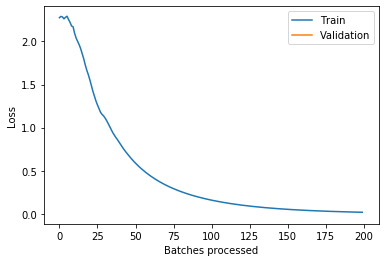

In [17]:
learn.recorder.plot_losses()